In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
train_data = pd.read_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Quora Data/train.csv")
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [41]:
test_data = pd.read_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Quora Data/test.csv")
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [43]:
train_data.shape

(404290, 6)

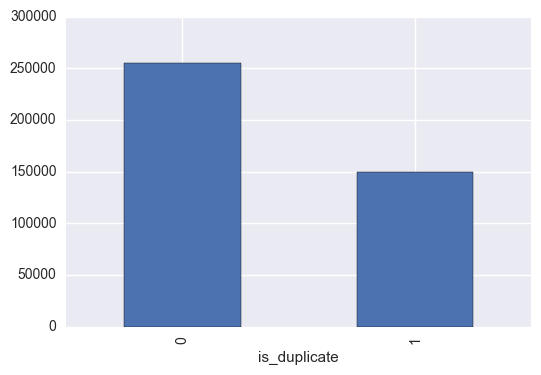

In [44]:
train_data.groupby("is_duplicate")['id'].count().plot.bar()

In [51]:
train_data["Number of words_1"] = train_data["question1"].apply(lambda x : len(str(x).split()))
train_data["Number of words_2"] = train_data["question2"].apply(lambda x : len(str(x).split()))

word_count_1 = train_data['Number of words_1'].value_counts()
word_count_2 = train_data['Number of words_2'].value_counts()

In [53]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,Number of words_1,Number of words_2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7


In [56]:
train = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
test = pd.Series(test_data['question1'].tolist() + test_data['question2'].tolist()).astype(str)


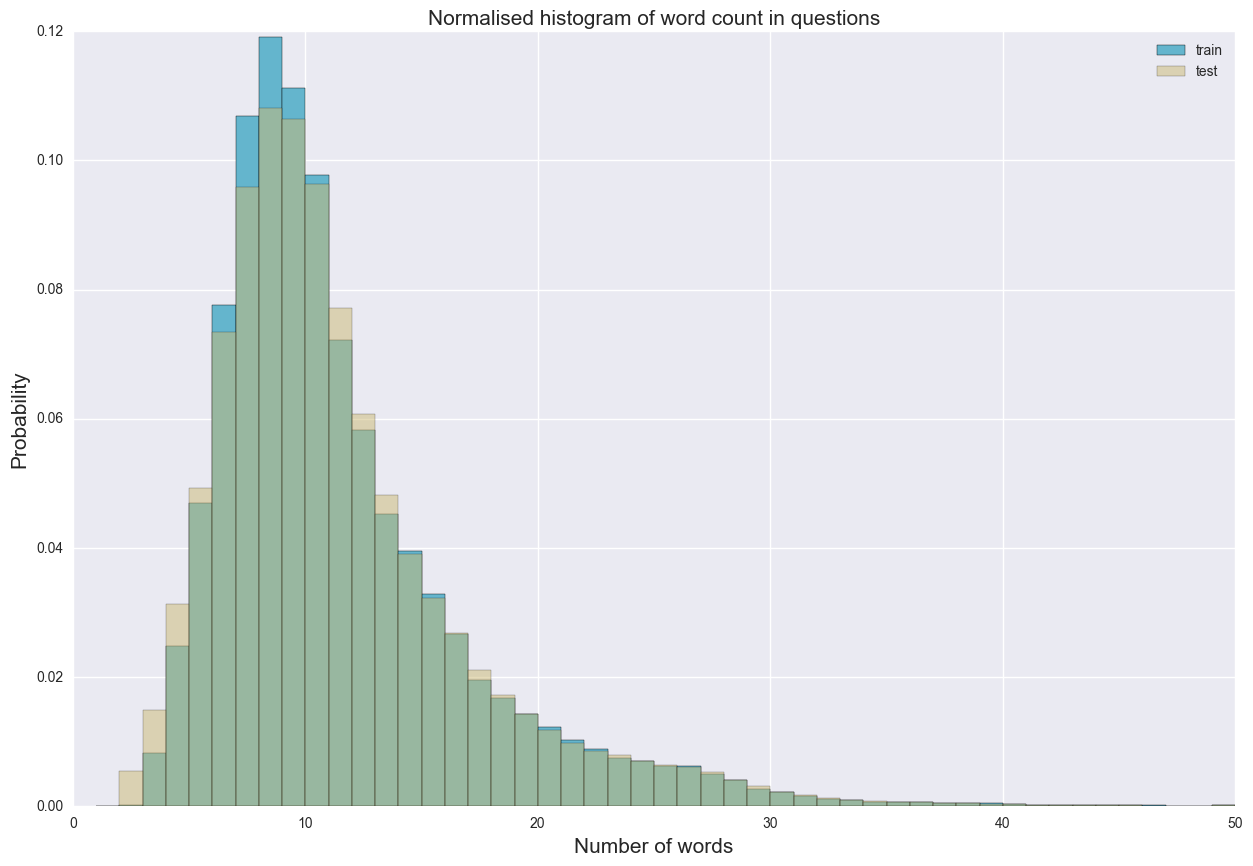

In [57]:
dist_train = train.apply(lambda x: len(x.split(' ')))
dist_test = test.apply(lambda x: len(x.split(' ')))

col = sns.color_palette()

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color= col[5], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color= col[4], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

(-0.5, 1439.5, 1079.5, -0.5)

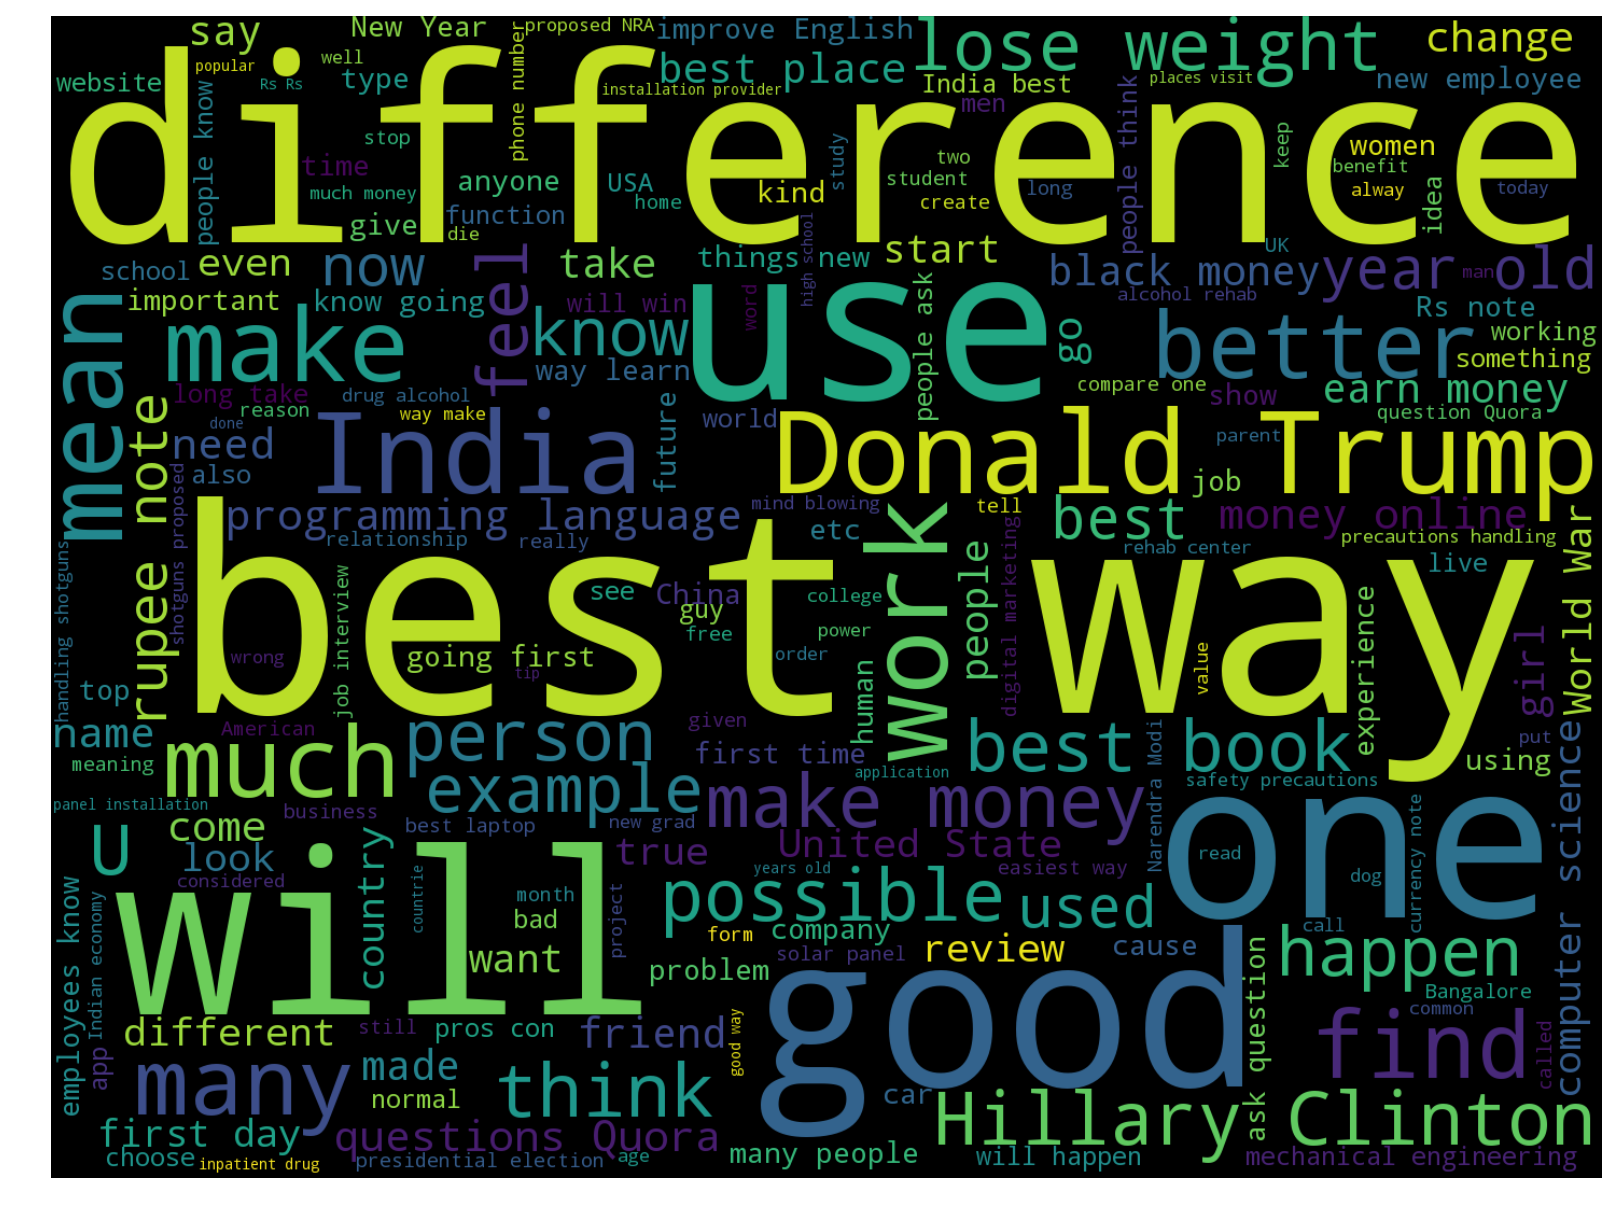

In [59]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

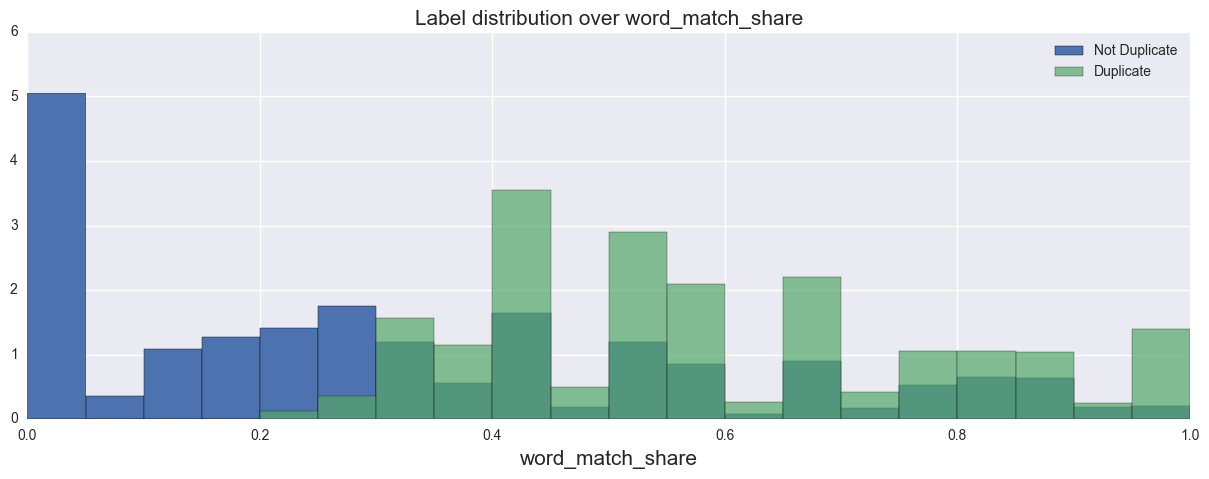

In [60]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = train_data.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[train_data['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[train_data['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [ ]:
#TF-IDF (term-frequency-inverse-document-frequency)


In [61]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [62]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('saccharin', 9.998000399920016e-05),
 ('210d?', 9.998000399920016e-05),
 ("romeo's", 9.998000399920016e-05),
 ('hyatt', 9.998000399920016e-05),
 ('election"', 9.998000399920016e-05),
 ('(svb):', 9.998000399920016e-05),
 ('[math]n[/math]?', 9.998000399920016e-05),
 ('browserstack', 9.998000399920016e-05),
 ('arithmetic?', 9.998000399920016e-05),
 ('tzinga', 9.998000399920016e-05)]

In [63]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

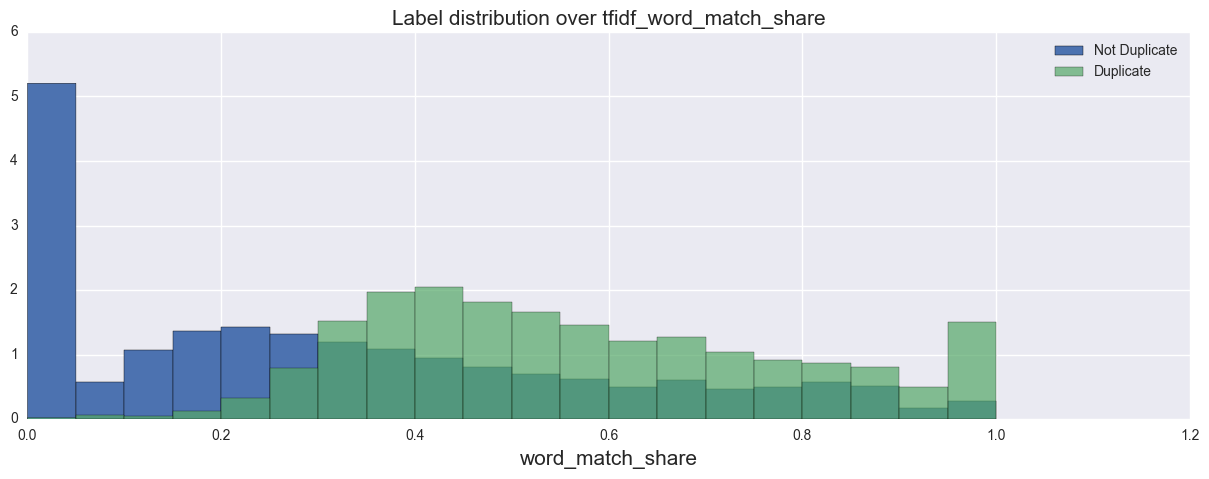

In [64]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = train_data.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[train_data['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[train_data['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [66]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_data['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(train_data['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.780553200628
   TFIDF AUC: 0.770562286575


In [67]:
#First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = test_data.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = test_data.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = train_data['is_duplicate'].values

In [68]:
# Finally, we split some of the data off for validation
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

C:\Users\Rashmita Rout\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [70]:
import xgboost as xgb

# Set parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50)

Will train until valid error hasn't decreased in 50 rounds.
[0]	train-logloss:0.686096	valid-logloss:0.686261
[1]	train-logloss:0.679718	valid-logloss:0.679565
[2]	train-logloss:0.673249	valid-logloss:0.673253
[3]	train-logloss:0.666735	valid-logloss:0.667207
[4]	train-logloss:0.660868	valid-logloss:0.661218
[5]	train-logloss:0.655295	valid-logloss:0.655655
[6]	train-logloss:0.649767	valid-logloss:0.650088
[7]	train-logloss:0.644328	valid-logloss:0.644853
[8]	train-logloss:0.639382	valid-logloss:0.639741
[9]	train-logloss:0.634285	valid-logloss:0.634893
[10]	train-logloss:0.629254	valid-logloss:0.630195
[11]	train-logloss:0.625144	valid-logloss:0.625563
[12]	train-logloss:0.620309	valid-logloss:0.621109
[13]	train-logloss:0.616033	valid-logloss:0.616804
[14]	train-logloss:0.611624	valid-logloss:0.612702
[15]	train-logloss:0.607563	valid-logloss:0.608763
[16]	train-logloss:0.603629	valid-logloss:0.604838
[17]	train-logloss:0.600036	valid-logloss:0.601141
[18]	train-logloss:0.596236	vali

In [72]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

submit = pd.DataFrame()
submit['test_id'] = test_data['test_id']
submit['is_duplicate'] = p_test
submit.to_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Quora Data/xgb_1.csv", index=False)